# Fórmulas de Derivación e Integración Numérica

Autor de esta versión: **Juan Antonio Villegas Recio**

Autor de la versión original: Pedro González Rodelas

Fecha de la primera versión: 08/09/2017

Sucesivas revisiones: 22/09/2017, 12,19/09/2018, 29/03 y 6, 20/04/2020, 24/04/2023

Fecha de la última revisión: 20/04/2025

Estructura del notebook y algunos ejemplos tomados o adaptados de los libros:

- "*Numerical Python: A Practical Techniques Approach for Industry*" de Robert Johansson. Edit. Apress (2015) con ISBN-13 (electronic): 978-1-4842-0553-2
- "*Numerical Methods in Engineering with Python 3*" de Jaan Kiusalaas. Edit Cambridge Univ. Press (2013) con ISBN: 978-1-107-03385-6
- "*Análisis Numérico con Mathematica*" de V. Ramírez, D. Barrera, M. Pasadas y P. González. Edit. Ariel Ciencia (2001) con ISBN: 84-344-8036-0. Dep. Legal: B.31.425-2001

En esta práctica nos ocuparemos de los métodos y algoritmos habituales para la derivación y la integración numéricas. Fundamentalmente nos centraremos en las fórmulas de tipo interpolatorio, que asumen que derivaremos o integraremos el correspondiente polinomio que interpole a la función en los nodos usados en la fórmula. En particular destacaremos las fórmulas que usan nodos equidistantes para la derivación aproximada, y revisaremos las fórmulas de integración numérica de Newton-Cotes más habituales (de los rectángulos, trapecios, Simpson, etc.), tanto en su versión simple como en sus versiones compuestas. También se presentarán fórmulas algo más avanzadas, como la integración de Romberg y las fórmulas de cuadratura gaussiana.

## 1. Carga de los módulos y funciones empleadas 🔨

Antes de empezar a realizar cualquier cálculo numérico o simbólico debemos de cargar los correspondientes módulos de Python que implementan la mayoría de funciones y procedimientos necesarios para ello: [`numpy`](https://numpy.org/) y [`sympy`](https://www.sympy.org/), que serán cargados con los pseudónimos `np` y `sp`, respectivamente. Además cargaremos también el submódulo `pyplot`, del paquete [`matplotlib`](https://matplotlib.org/), que nos permitirá realizar las representaciones gráficas que nos ayudarán a visualizar todo el proceso. También importaremos la función [`random`](https://docs.python.org/3/library/random.html#random.random) del módulo [`random`](https://docs.python.org/3/library/random.html), encargada de la generación de números aleatorios.

In [1]:
# Carga de librerías necesarias
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from random import random

## 2. Obtención de fórmulas de tipo interpolatorio 〰️

Para obtener fórmulas de derivación o integración numéricas a partir de la interpolación polinómica necesitamos calcular, en primer lugar, el polinomio de interpolación y después la derivada correspondiente en un punto $a$ o la integral en un intervalo $[a,b]$. En lo que respecta a la derivación numérica, consideraremos distintos órdenes de derivación. Los datos de interpolación para las fórmulas de derivación numérica podrán ser lagrangianos fundamentalmente, aunque para las fórmulas de integración numérica también podrían ser de tipo Hermite. Así pues la idea detrás de todas estas fórmulas de tipo interpolatorio será la de obtener en primer lugar el correspondiente polinomio interpolador (satisfaciendo los datos indicados) y posteriormente aplicarle la derivada o integral a dicho polinomio en vez de a la función, para obtener así la correspondiente fórmula numérica. Es decir $$\mathcal{L}(f)\approx\mathcal{L}(p) $$
donde $p$ es el polinomio que interpola a $f$ en los datos concretos indicados y $\mathcal L$ es el operador derivada o integral.

### 2.1. Fórmulas de derivación numérica 🍟

En las fórmulas de derivación numérica, los nodos que intervienen, es decir los puntos de interpolación de la función $f$, suelen ser
el punto $a$ y/o ciertos puntos cercanos a su derecha e/o izquierda, de la forma $a\pm h$, $a\pm 2h$, etc.

Las primeras fórmulas que vamos a obtener son las que utilizan los nodos $a$ y $a+h$, o $a-h$, para la derivada primera.

In [2]:
f = sp.Function('f')                # Crea función simbólica
a,h = sp.symbols('a,h')
x_values = [a,a+h]                  # Intervalo simbólico, lista que contiene variables simbólicas
x_values

[a, a + h]

In [3]:
y_values = [f(x_values[0]),f(x_values[1])]
y_values

[f(a), f(a + h)]

In [4]:
x = sp.Symbol('x')  # utilizaremos z como variable simbólica
p = (y_values[1]-y_values[0])/(x_values[1]-x_values[0])*(x-x_values[0])+y_values[0]
p  # este sería el polinomio interpolador de grado $1$, ecuación recta tangente con derivada aproximada (f(b)-f(a))/(b-a)

f(a) + (-a + x)*(-f(a) + f(a + h))/h

In [5]:
p.subs({x:x_values[0]}),p.subs({x:x_values[1]}) #  Comprobamos que el polinomio interpolador pasa por los puntos (a,f(a)) y (a+h,f(a+h))

(f(a), f(a + h))

Derivemos ahora simbólicamente dicho polinomio, para ver cúal sería su derivada de primer orden

In [6]:
sp.diff(p,x)# Derivada respecto x

(-f(a) + f(a + h))/h

Esta será pues la fórmula de derivación numérica obtenida a partir de estos datos de interpolación $(a,f(a))$ y $(a+h,f(a+h))$

$\mathcal{L}(f)\equiv f'(a) \approx p'(a) = \frac{f(a+h)-f(a)}{h}$

> **Ejercicio 1:** Pruebe ahora a repetir el mismo proceso, pero con los datos de interpolación  
> 
> a) $(a-h,f(a-h))$ y $(a,f(a))$,
> 
> b) $(a-h,f(a-h))$ y $(a+h,f(a+h))$. 
> 
> ¿Qué fórmulas de derivación numérica se obtiene en cada caso?

A continuación vamos a usar tres nodos en vez de dos, empecemos por ejemplo con $a-h$, $a$ y $a+h$ para la derivada primera. Este tipo de fómulas que emplean de manera simétrica puntos a ambos lados del punto de derivación se suelen denominar *centradas*.

In [7]:
x_values = [a-h, a, a+h]  # estos serán los nodos de interpolación, 3 nodos -> polinomio interpolación de grado 2
y_values = [f(xi) for xi in x_values]  # y los valores interpolados
y_values

[f(a - h), f(a), f(a + h)]

In [8]:
from sympy.polys.polyfuncs import interpolate

data = list(zip(x_values, y_values))  # lista de tuplas (x,y) para los nodos de interpolación
interpolated_poly = interpolate(data, x)
interpolated_poly

-a**2*f(a)/h**2 + a**2*f(a - h)/(2*h**2) + a**2*f(a + h)/(2*h**2) + a*f(a - h)/(2*h) - a*f(a + h)/(2*h) + 2*a*x*f(a)/h**2 - a*x*f(a - h)/h**2 - a*x*f(a + h)/h**2 + f(a) - x*f(a - h)/(2*h) + x*f(a + h)/(2*h) - x**2*f(a)/h**2 + x**2*f(a - h)/(2*h**2) + x**2*f(a + h)/(2*h**2)

In [9]:
# Comprobamos que el polinomio interpolador pasa por los puntos (a-h,f(a-h)), (a,f(a)) y (a+h,f(a+h))
interpolated_poly.subs({x:a-h}).simplify(), \
interpolated_poly.subs({x:a}).simplify(), \
interpolated_poly.subs({x:a+h}).simplify()

(f(a - h), f(a), f(a + h))

Ahora para obtener la correspondiente fórmula de derivación numérica, bastará con derivar dicho polinomio respecto de la variable independiente y evaluar en el punto donde queremos aproximar la derivada; es decir calculamos $p_2'(a) = \frac{f(a+h)-f(a-h)}{2h}$.

Vemos que resulta una fórmula con sólo dos nodos, uno a cada lado del punto $a$, ya que el coeficiente de $f(a)$ vale cero. Comprobémoslo:

In [10]:
sp.diff(interpolated_poly,x).subs({x:a}).simplify()

(-f(a - h) + f(a + h))/(2*h)

Pero al tratarse ahora de un polinomio de interpolación de grado $2$ nada nos impide calcular también su derivada de segundo orden, que nos serviría en este caso como aproximación del correspondiente operador de derivada segunda

$$\mathcal{L}(f)\equiv f''(a)\approx p''(a)$$

In [11]:
# Nótese que en este caso, ni siquiera hemos tenido que evaluar dicha derivada en el punto x=a,
# al ser esta constante.
sp.diff(interpolated_poly, x, 2)

(-2*f(a) + f(a - h) + f(a + h))/h**2

Por último vamos a obtener también otras fórmulas para la derivada primera o segunda, que sean de tipo *descentrado*, utilizando por ejemplo los nodos $a$, $a+h$ y $a+2h$. El procedimiento es igual que antes, solo cambian los puntos de las listas x e y.

Creamos las listas de nodos y calculamos el polinomio interpolador.

In [12]:
x_values = [a, a+h, a+2*h]
y_values = [f(xi) for xi in x_values]
data = list(zip(x_values, y_values))  # lista de tuplas (x,y) para los nodos de interpolación
interpolated_poly = interpolate(data, x)
interpolated_poly

a**2*f(a)/(2*h**2) - a**2*f(a + h)/h**2 + a**2*f(a + 2*h)/(2*h**2) + 3*a*f(a)/(2*h) - 2*a*f(a + h)/h + a*f(a + 2*h)/(2*h) - a*x*f(a)/h**2 + 2*a*x*f(a + h)/h**2 - a*x*f(a + 2*h)/h**2 + f(a) - 3*x*f(a)/(2*h) + 2*x*f(a + h)/h - x*f(a + 2*h)/(2*h) + x**2*f(a)/(2*h**2) - x**2*f(a + h)/h**2 + x**2*f(a + 2*h)/(2*h**2)

Comprobamos (opcional)

In [13]:
# Comprobamos que el polinomio interpolador pasa por los puntos (a,f(a)), (a+h,f(a+h)) y (a+2h,f(a+2h))
interpolated_poly.subs({x:a}).simplify(), \
interpolated_poly.subs({x:a+h}).simplify(), \
interpolated_poly.subs({x:a+2*h}).simplify()

(f(a), f(a + h), f(a + 2*h))

Calculamos las derivadas

In [14]:
# Primera derivada evaluada en el punto x=a
sp.diff(interpolated_poly,x).subs({x:a}).simplify()

(-3*f(a) + 4*f(a + h) - f(a + 2*h))/(2*h)

In [15]:
# Derivada segunda evaluada en el punto x=a
sp.diff(interpolated_poly,x,2)

(f(a) - 2*f(a + h) + f(a + 2*h))/h**2

Pero si queremos obtener otras *fórmulas centradas* para la derivada segunda, usando ahora por ejemplo cinco nodos simétricos, $a-2h, \; a-h, \; a,
\; a+h$ y $a+2h$, deberemos calcular entonces el correspondiente polinomio de interpolación de grado $4$.

Procedamos como antes, de manera progresiva, calculando lo correspondientes polinomios de interpolación de Newton, interpolando un dato más de Lagrange cada vez.

In [16]:
x_values = [a-2*h, a-h, a, a+h, a+2*h] # nodos de interpolación
y_values = [f(xi) for xi in x_values]
data = list(zip(x_values, y_values))  # lista de tuplas (x,y) para los nodos de interpolación
interpolated_poly = interpolate(data, x)
# interpolated_poly

In [17]:
# esta será la fórmula obtenida esta vez para aproximar la derivada segunda f''(a)
formula=sp.diff(interpolated_poly,x,2).subs({x:a}).simplify() 
formula

(-30*f(a) - f(a - 2*h) + 16*f(a - h) + 16*f(a + h) - f(a + 2*h))/(12*h**2)

Y de igual forma se obtendría cualquier otra fórmula de derivación numérica de tipo interpolatorio. La cuestión será obtener primero el correspondiente polinomio de interpolación, usando la fórmula o el procedimiento simbólico que consideremos más oportuno, y después derivar dicho polinomio, también simbólicamente, antes de evaluar en el punto en cuestión donde queremos aproximar la derivada, tal y cómo hemos hecho en los ejemplos anteriores.

> **Ejercicio 2:** Codifica una función para calcular la fórmula de derivación de tipo interpolatorio obtenida al derivar el polinomio interpolador en una lista de nodos que acepte como argumento. Añade un argumento opcional que sea el orden de la derivada a calcular. Comprueba el correcto funcionamiento de esta función con los ejemplos mostrados hasta el momento.

A continuación vamos a analizar otra de las cuestiones importantes que tienen que ver con este tipo de fórmulas, *el orden o grado de exactitud* de la misma (se presupone que para funciones de tipo polinómico). Comprobémoslo por ejemplo en el caso de la última fórmula obtenida. Tenemos que ver hasta qué potencia del tipo $x^i$, con $i$ entero natural, dicha fórmula no sólo es aproximada, sino que resulta exacta. De antemano, por construcción, dicha exactitud está garantizada para $i=0,\,1,\, 2,\, 3$ y $4$, por tratarse de una fórmula de tipo interpolatorio. Sin embargo, vamos a probar que pasa con el valor $i=5$ y posteriores. Ser exacta en una base ${1, x, . . . , x^m}$ de $\mathbb{P}_m$ equivale, por linealidad, a serlo
en todo el espacio $\mathbb{P}_m$.

In [18]:
formula_der = lambda f: (-30*f(a)-f(a-2*h)+16*f(a-h)+16*f(a+h)-f(a+2*h))/(12*h**2) # fórmula derivada
formula_der(sp.Function('g'))

(-30*g(a) - g(a - 2*h) + 16*g(a - h) + 16*g(a + h) - g(a + 2*h))/(12*h**2)

In [19]:
formula_der(sp.sin)

(-30*sin(a) - sin(a - 2*h) + 16*sin(a - h) + 16*sin(a + h) - sin(a + 2*h))/(12*h**2)

In [20]:
exact_values =[sp.diff(x**i,x,2).subs({x:a}) for i in range(10)]    # Derivada segunda de x^i con i=0,...,10
exact_values

[0, 0, 2, 6*a, 12*a**2, 20*a**3, 30*a**4, 42*a**5, 56*a**6, 72*a**7]

In [21]:
# Evaluamos formula_der() en x^i con i=0,...,10, es decir, 
# derivamos x^i con la fórmula de derivación obtenida a partir de interpolación
approx_values =[formula_der(lambda x:x**i).simplify() for i in range(10)]
approx_values

[0,
 0,
 2,
 6*a,
 12*a**2,
 20*a**3,
 30*a**4 - 8*h**4,
 42*a**5 - 56*a*h**4,
 56*a**6 - 224*a**2*h**4 - 40*h**6,
 72*a**7 - 672*a**3*h**4 - 360*a*h**6]

In [22]:
# Si ahora lo que queremos es restar estos resultados uno a uno, debemos convertir estas listas en arrays
# Estamos comparando el funcional derivada con el funcional calculado con la interpolación polinómica
np.array(approx_values) - np.array(exact_values)

array([0, 0, 0, 0, 0, 0, -8*h**4, -56*a*h**4, -224*a**2*h**4 - 40*h**6,
       -672*a**3*h**4 - 360*a*h**6], dtype=object)

In [23]:
# Otra opción siempre sería hacerlo elemento a elemento mediante un índice que recorra las distintas componenentes de ambas listas
for i in range(10):
    print(f"Diferencia entre el valor aproximado y el valor exacto de (x^{i})\'\': {approx_values[i]- exact_values[i]}")
print("comprobación terminada; deduzca de aquí el grado de exactitud de la fórmula")

Diferencia entre el valor aproximado y el valor exacto de (x^0)'': 0
Diferencia entre el valor aproximado y el valor exacto de (x^1)'': 0
Diferencia entre el valor aproximado y el valor exacto de (x^2)'': 0
Diferencia entre el valor aproximado y el valor exacto de (x^3)'': 0
Diferencia entre el valor aproximado y el valor exacto de (x^4)'': 0
Diferencia entre el valor aproximado y el valor exacto de (x^5)'': 0
Diferencia entre el valor aproximado y el valor exacto de (x^6)'': -8*h**4
Diferencia entre el valor aproximado y el valor exacto de (x^7)'': -56*a*h**4
Diferencia entre el valor aproximado y el valor exacto de (x^8)'': -224*a**2*h**4 - 40*h**6
Diferencia entre el valor aproximado y el valor exacto de (x^9)'': -672*a**3*h**4 - 360*a*h**6
comprobación terminada; deduzca de aquí el grado de exactitud de la fórmula


Observamos claramente que efectivamente la fórmula es exacta para polinomios hasta grado $5$, ya que los resultados obtenidos al aplicar la fórmula a los monomios correspondientes da idéntico resultado que calculando sus derivadas segundas directamente, y claramente el proceso de derivación constituye una forma lineal.

Sin embargo, para $i=6$ por ejemplo, el valor proporcionado es $30 a^4-8h^4$, cuya diferencia con el valor exacto es el término $-8h^4$. Errores del mismo orden $O(h^4)$ también aparecen en los demás casos, con $i\geq 6$. Así pues concluimos que el orden de exactitud para funciones polinómicas es $5$ y que el orden de aproximación puede ser $4$, aunque habrá que comprobarlo fehacientemente para funciones arbitrarias (no sólo polinómicas) mediante desarrollos de Taylor.

In [24]:
f(x)

f(x)

Obsérvese que podemos obtener derivadas simbólicas del orden que necesitemos

In [25]:
sp.diff(f(x),x)

Derivative(f(x), x)

In [26]:
sp.diff(f(x),x,5)

Derivative(f(x), (x, 5))

Pero vemos que habrá que tener cuidado cuando se evaluen las derivadas en puntos concretos.

In [27]:
# Esta orden de python nos da la derivada respecto a a, no la derivada respecto a z evaluada en z=a
(sp.diff(f(x),x)).subs({x:a})

Derivative(f(a), a)

In [28]:
# Esto puede simular la derivada del orden requerido, evaluada en el punto concreto x = a
k=1;
sp.diff(f(x-h),x,k).subs({x:a+h}) 

Subs(Derivative(f(_xi_1), _xi_1), _xi_1, a)

In [29]:
k=2;
sp.diff(f(x-h),x,k).subs({x:a+h})

Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, a)

Sin embargo, para obtener el polinomio de Taylor será mejor utilizar la orden `series` del módulo `sympy`.

In [30]:
?sp.series

Signature: sp.series(expr, x=None, x0=0, n=6, dir='+')
Docstring:
Series expansion of expr around point `x = x0`.

Parameters

expr : Expression
       The expression whose series is to be expanded.

x : Symbol
    It is the variable of the expression to be calculated.

x0 : Value
     The value around which ``x`` is calculated. Can be any value
     from ``-oo`` to ``oo``.

n : Value
    The number of terms upto which the series is to be expanded.

dir : String, optional
      The series-expansion can be bi-directional. If ``dir="+"``,
      then (x->x0+). If ``dir="-"``, then (x->x0-). For infinite
      ``x0`` (``oo`` or ``-oo``), the ``dir`` argument is determined
      from the direction of the infinity (i.e., ``dir="-"`` for
      ``oo``).

Examples

>>> from sympy import series, tan, oo
>>> from sympy.abc import x
>>> f = tan(x)
>>> series(f, x, 2, 6, "+")
tan(2) + (1 + tan(2)**2)*(x - 2) + (x - 2)**2*(tan(2)**3 + tan(2)) +
(x - 2)**3*(1/3 + 4*tan(2)**2/3 + tan(2)**4) + (x - 2)*

A continuación, utilizaremos la serie de Taylor hasta orden $n-1$ para aproximar una función cualquiera mediante un polinomio, y a dicha serie le aplicaremos algunas de las fórmulas de derivación numérica deducidas, pudiendo comprobar el orden de aproximación.

In [31]:
n = 5
(f(x).series(x,a,n))

f(a) + (-a + x)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, a) + (-a + x)**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, a)/2 + (-a + x)**3*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, a)/6 + (-a + x)**4*Subs(Derivative(f(_xi_1), (_xi_1, 4)), _xi_1, a)/24 + O((-a + x)**5, (x, a))

In [32]:
n=5
fseries = (f(x).series(x,a,n)).removeO()    # Series de Taylor de f(z) en el punto z=a hasta orden n-1 sin incluir O(z^5)
fseries

(-a + x)**4*Subs(Derivative(f(_xi_1), (_xi_1, 4)), _xi_1, a)/24 + (-a + x)**3*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, a)/6 + (-a + x)**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, a)/2 + (-a + x)*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, a) + f(a)

Recordemos la fórmula de la derivada primera centrada
$$
f'(a) \approx \dfrac 1 {2h} (f(a+h) - f(a-h))
$$
Aproximamos $f(a+h)$ y $f(a-h)$ mediante la evaluación del polinomio de Taylor en $x=a+h$ y $x=a-h$ respectivamente.

In [33]:
fmas    = fseries.subs({x:(a+h)})           # Polin. Taylor para x=a+h
fmenos  = fseries.subs({x:(a-h)})           # Polin. Taylor para x=a-h

In [34]:
fmas

h**4*Subs(Derivative(f(_xi_1), (_xi_1, 4)), _xi_1, a)/24 + h**3*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, a)/6 + h**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, a)/2 + h*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, a) + f(a)

In [35]:
fmenos

h**4*Subs(Derivative(f(_xi_1), (_xi_1, 4)), _xi_1, a)/24 - h**3*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, a)/6 + h**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, a)/2 - h*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, a) + f(a)

Aplicamos la fórmula de la primera derivada centrada y obtenemos

In [36]:
sp.expand((fmas - fmenos)/(2*h))

h**2*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, a)/6 + Subs(Derivative(f(_xi_1), _xi_1), _xi_1, a)

Comprobamos que el error de aproximación es, como se dijo en teoría, de orden $h^2$.

> **Ejercicio 3**: Repita este procedimiento con la fórmula para la segunda derivada
> $$
> f''(a) \approx \frac{f(a+h)-2f(a)+f(a-h)}{h^2}
> $$
> y compruebe que tiene orden de aproximación 2.

### 2.2. Fórmulas para derivadas de orden elevado ↗️

Para la obtención de nuevas fórmulas de derivación numérica de alto orden, otra estrategia posible sería la aplicación reiterada de otras fórmulas de orden inferior. Esta técnica suele proporcionar nuevas fórmulas que aproximan bien esta derivada de orden superior, sobre todo cuando se usan fórmulas centradas o bien fórmulas descentradas, pero todas en la misma dirección. Si no se respeta esta premisa, la fórmula resultante puede ser inservible y habrá que verificarla en todo caso. Veámos algunos ejemplos de cómo hacerlo.

Veámos cómo obtener aproximaciones de la derivada segunda a partir de la aplicación reiterada de fórmulas para la derivada primera:

Si $f'(a)\approx \frac{f(a+h)-f(a)}{h}$ y $f'(a+h)\approx \frac{f(a+2h)-f(a+h)}{h}$, entonces podemos introducirlas en la siguiente aproximación de la derivada segunda

$$f''(a)\approx \frac{f'(a+h)-f'(a)}{h}\approx \frac{\frac{f(a+2h)-f(a+h)}{h}-\frac{f(a+h)-f(a)}{h}}{h}=\frac{f(a+2h)-2f(a+h)+f(a)}{h^2}$$

De forma totalmente análoga podríamos haber obtenido la corresponiente fórmula descentrada en el otro sentido

$$f''(a)\approx \frac{f'(a)-f'(a-h)}{h}\approx \frac{\frac{f(a)-f(a-h)}{h}-\frac{f(a-h)-f(a-2h)}{h}}{h}=\frac{f(a)-2f(a-h)+f(a-2h)}{h^2}$$

Si ahora empleamos fórmulas centradas, $f'(a)\approx \frac{f(a+h)-f(a-h)}{2h}$ entonces tendríamos

$$f''(a)\approx \frac{f'(a+h)-f'(a-h)}{2h}\approx \frac{\frac{f(a+2h)-f(a)}{2h}-\frac{f(a)-f(a-2h)}{2h}}{2h}=\frac{f(a+2h)-2f(a)+f(a-2h)}{4h^2}$$


Aproximemos ahora la derivada de una función suficientemente derivable, de la que podemos disponer de sus valores tanto a la izquierda como a la derecha del punto donde queremos obtener la derivada cuarta

$$f^{iv)}(a)\equiv \frac{d^2}{dx^2}_{|x=a}f''(x)\approx \frac{f''(a+h)-2f''(a)+f''(a-h)}{h^2}\approx \\
\frac{\frac{f(a+2h)-2f(a+h)+f(a)}{h^2}-2\frac{f(a+h)-2f(a)+f(a-h)}{h^2}+\frac{f(a)-2f(a-h)+f(a-2h)}{h^2}}{h^2}= \\
\frac{f(a+2h)-4f(a+h)+6f(a)-4f(a-h)+f(a-2h) }{h^4}$$

### 2.3. Comportamiento del error en las fórmulas de derivación numérica 👮

Como es bien conocido, aunque sea muy simple, toda fórmula de derivación numérica que se obtuvo en el desarrollo teórico es convergente.
Los errores teóricos siempre tienden a cero cuando $h$ tiende a cero. Sin embargo, en el cálculo llevado a cabo por ordenador suelen aparecer otros errores que pueden desaconsejar el uso
de valores muy pequeños de $h$ si se quiere una buena aproximación. Es lo que ocurre con el eror de cancelación en las fórmulas
de derivación numérica. Veámoslo con algún ejemplo: vamos a dar el valor de las derivadas numéricas de una función $f$ en el punto $a=2$,
con la fórmula $\frac{f(a+h)-f(a)}{h}$ para valores de $h$ de la forma $h=10^{-j}$ con $j\geq 1$. Veremos que llega un momento en el
que la derivada numérica deja de converger, con unas oscilaciones no controlables, para después pasar a valer cero, porque el numerador
vale cero. Esto último ocurre cuando $h$ es tan pequeño que para el ordenador $a+h$ y $h$ toman el mismo valor como *número máquina*.

In [37]:
def func(x):
    """función (x-0.5)/(1+x^2)"""
    return (z-0.5)/(1+z**2)

In [38]:
f = lambda x: (x-0.5)/(1+x**2)  # Definimos la función a evaluar

In [39]:
a=2. # El valor exacto de la derivada de la función en este punto
vexacto = (sp.diff(f(x),x)).subs({x:a}) # sería el siguiente
vexacto

-0.0400000000000000

In [40]:
n=20 # Calculemos aproximaciones, mediante una fórmula numérica de la derivada primera progresiva
dersnum = np.array([(f(a+10**(-j))-f(a))/(10**(-j)) for j in range(n+1)])
print(dersnum)  # con h desde 10^0 hasta el valor 10^(-n).

[-0.05       -0.04251386 -0.04027698 -0.04002797 -0.0400028  -0.04000028
 -0.04000003 -0.04       -0.04       -0.04       -0.03999967 -0.04000134
 -0.03996803 -0.03996803 -0.03885781  0.          0.          0.
  0.          0.          0.        ]


In [41]:
errores = np.array(dersnum) - vexacto  # Aquí podemos ver una tabla
print(errores)                         # con los errores cometidos

[-0.0100000000000000 -0.00251386321626584 -0.000276978631370606
 -2.79696187167056e-5 -2.79969607058783e-6 -2.79993845941906e-7
 -2.80120771578574e-8 -2.75450334763505e-9 2.24150026317815e-9
 -3.30961485994763e-9 3.29757292527599e-7 -1.33557724441014e-6
 3.19711134943446e-5 3.19711134943446e-5 0.00114219413811950
 0.0400000000000000 0.0400000000000000 0.0400000000000000
 0.0400000000000000 0.0400000000000000 0.0400000000000000]


Vemos pues que los valores redondeados, con seis cifras significativas, de la derivada numérica para $j=6,7,8$ y $9$ coincidirán con el valor exacto. Además observamos que al principio, a medida que $h$ disminuye, el error (fundamentalmente de *truncatura*) también disminuye, después empieza a haber comportamientos extraños, donde los errores pueden empezar a aumentar de nuevo; y finalmente la aproximación que da es cero (aquí el error predominante sería el de *cancelación*). Comprobémoslo a continuación.

In [42]:
[sp.N(dersnum[k],6) for k in range(n+1)] # con 6 cifras significativas

[-0.0500000,
 -0.0425139,
 -0.0402770,
 -0.0400280,
 -0.0400028,
 -0.0400003,
 -0.0400000,
 -0.0400000,
 -0.0400000,
 -0.0400000,
 -0.0399997,
 -0.0400013,
 -0.0399680,
 -0.0399680,
 -0.0388578,
 0,
 0,
 0,
 0,
 0,
 0]

> **Ejercicio 4:** Utilice la función $f(x) = \dfrac{e^{\cos(x)}}{x^2+1}$ y el valor $a=1$ y compruebe que ocurre este mismo hecho. Repita el procedimiento utilizando la fórmula de diferencia centrada en lugar de la de diferencia progresiva y comenta las diferencias observadas.

> **Ejercicio 5 (Implementación numérica de las fórmulas de derivación):** Implementa una función que acepte como argumentos una función en versión numérica `f`, un valor `a`, un valor `h`, un entero opcional `n` y un cuarto argumento que sea la fórmula de derivación numérica utilizada. La función deberá calcular la derivada `n`-ésima de la función `f` en el punto `a` utilizando la fórmula y el valor de `h` indicados. Las posibles fórmulas utilizadas deben incluir, al menos: diferencia regresiva, diferencia progresiva, diferencia centrada y diferencia centrada con 5 nodos. Para la función $$f(x) = \sin(\log(x^2+1)),$$ calcula el valor de $f'(-1)$, primero derivando una versión simbólica y obteniendo el valor exacto y después utilizando la función implementada con distintos valores de `h` y distintas fórmulas y comprueba las diferencias en la aproximación en cada caso.

## 2.2. Integración numérica 🍠

### 2.2.1. Fórmulas de los rectángulos 🔲

Entre las fórmulas de integración numérica más simples que hay están las denominadas *fórmulas de los rectángulos*, que además son usadas normalmente para la definición de las denominadas *sumas de Riemann* y el correspondiente concepto de *Integral de Riemann*.

Veámos a continuación cómo obtenerlas; en el caso de considerar un sólo rectángulo que aproxime por ejemplo a la siguiente región del semiplano superior (con $y\geq 0$)

$$\mathcal{R}\equiv\{ (x,y)\in \mathbb{R}^2 : a\leq x\leq b,\; 0\leq y\leq f(x)  \}$$

aproximaríamos la correspondiente integral de la siguiente manera, sustituyendo la función integrando por una función constante en dicho intervalo de integración

$area(R)=\int_a^b f(x)\,dx \approx \int_a^b f(x_0)\,dx =(b-a)f(x_0),$ para cierto punto $x_0\in[a,b]$, que a veces tomaremos como:
- $x_0=a$, obteniéndose la *fórmula del rectángulo izquierdo* $\int_a^b f(x)\,dx \approx (b-a)f(a),$
- $x_0=b$, obteniéndose la *fórmula del rectángulo derecho* $\int_a^b f(x)\,dx \approx (b-a)f(b),$
- $x_0=\frac{a+b}{2}$, obteniéndose en este caso la *fórmula del rectángulo del punto medio* $\int_a^b f(x)\,dx \approx (b-a)f(\frac{a+b}{2})$.

Nótese que, en todos los casos, lo que se tiene es el área del correspondiente rectángulo, cuya base mide $b-a$ y la altura será la determinada por el valor $f(x_0)$. Cuando este valor de la función sea negativo en vez de positivo, entonces obtendríamos el área del correspondiente rectángulo pero cambiada de signo, que ahora estaría por debajo del eje $Ox$, justo lo mismo que el concepto de integral mide el área de las regiones del semiplano inferior (con $y\leq 0$).

$$\mathcal{R}\equiv\{ (x,y)\in \mathbb{R}^2 : a\leq x\leq b,\; f(x)\leq y\leq 0 \},$$
donde 
$$\int_a^b f(x)\,dx = -area(\mathcal{R})$$ 
en este caso.

A continuación definimos dos funciones auxiliares que nos servirán en las representaciones. Son polinomios interpoladores de grado 1 y 2, respectivamente, es decir, la línea que une dos puntos y la parábola que pasa por 3 puntos. Nótese el uso de `np.interp`, que es la versión numérica de `sp.interpolate`. También importaremos el submódulo `patches`, que posteriormente nos servirá para dibujar rectángulos en las gráficas.

In [43]:
import matplotlib.patches as patches
x = sp.Symbol('x')

xL,yL,xM,yM,xR,yR = sp.symbols('x_L,y_L,x_M,y_M,x_R,y_R')
dyL,dyR = sp.symbols('dyL,dyR')

def linea(x,xL,yL,xR,yR):
    """línea uniendo los puntos (xL,yL) y (xR,yR)"""
    return np.interp(x, [xL,xR], [yL,yR])  # Interpolación lineal entre los puntos (xL,yL) y (xR,yR)

def parabola(x,xL,yL,xM,yM,xR,yR):
    """parábola uniendo los puntos (xL,yL), (xM,yM) y (xR,yR)"""
    return np.interp(x, [xL, xM, xR], [yL, yM, yR])


Como ejemplo, trataremos de calcular la integral de la función $f(x) = x^2+1$ en el intervalo $[0,1]$, es decir, $\displaystyle\int_0^1 (x^2+1)dx$. Primero veamos cuál es el valor exacto de esta integral.

In [44]:
def func(x):
    """función x^2+1"""
    return x**2+1

a, b = 0, 1

f = func
valor_exacto = sp.integrate(f(x),(x,a,b)) # valor exacto de la integral definida
valor_exacto

4/3

Text(0.5, 1.0, 'Fórmula del rectángulo del punto medio')

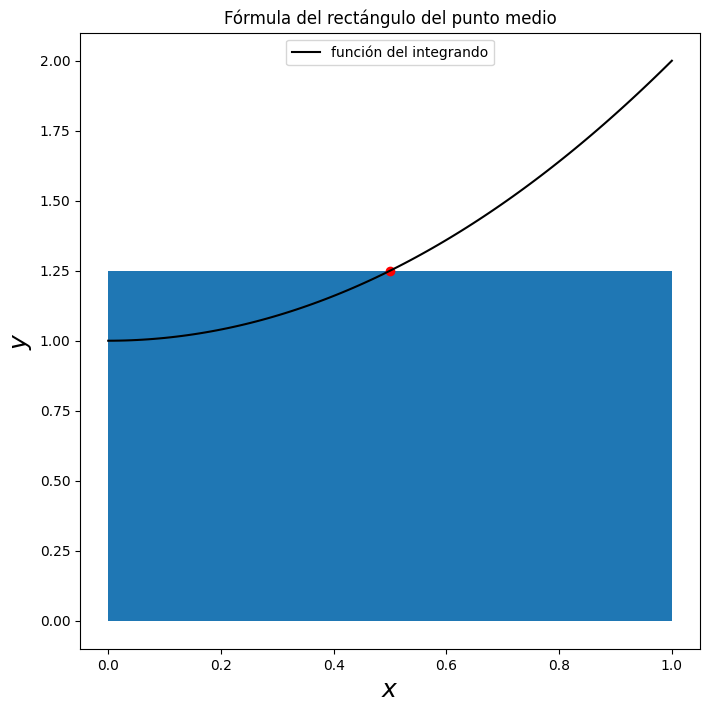

In [45]:
num_values = 100; a = 0; b = 1  # Número de puntos y límites del intervalo de integración
x_values = np.linspace(float(a), float(b), num_values)  # Genera valores de x uniformemente distribuidos en [a, b]
y_values = f(x_values)  # Calcula los valores de la función en los puntos x
x0 = (a + b) / 2  # Calcula el punto medio del intervalo
y0 = f(x0)  # Evalúa la función en el punto medio

# Configuración de la figura y los ejes
fig, ax = plt.subplots(figsize=(8, 8))  
ax.plot(x0, y0, 'ro',)  # Dibuja el punto medio en rojo
ax.plot(x_values, y_values, 'k', label='función del integrando')  # Dibuja la función en negro

# Añade un rectángulo que representa la aproximación de la integral
ax.add_patch(
    patches.Rectangle(
        (a, 0),   # (x, y) coordenadas de la esquina inferior izquierda del rectángulo
        b - a,    # Anchura del rectángulo (longitud del intervalo)
        y0,       # Altura del rectángulo (valor de la función en el punto medio)
    )
)

# Configuración de etiquetas, leyenda y título
ax.legend(loc=9)  # Añade la leyenda en la parte superior central
ax.set_xlabel('$x$', fontsize=18)  # Etiqueta del eje x
ax.set_ylabel('$y$', fontsize=18)  # Etiqueta del eje y
ax.set_title('Fórmula del rectángulo del punto medio')  # Título del gráfico

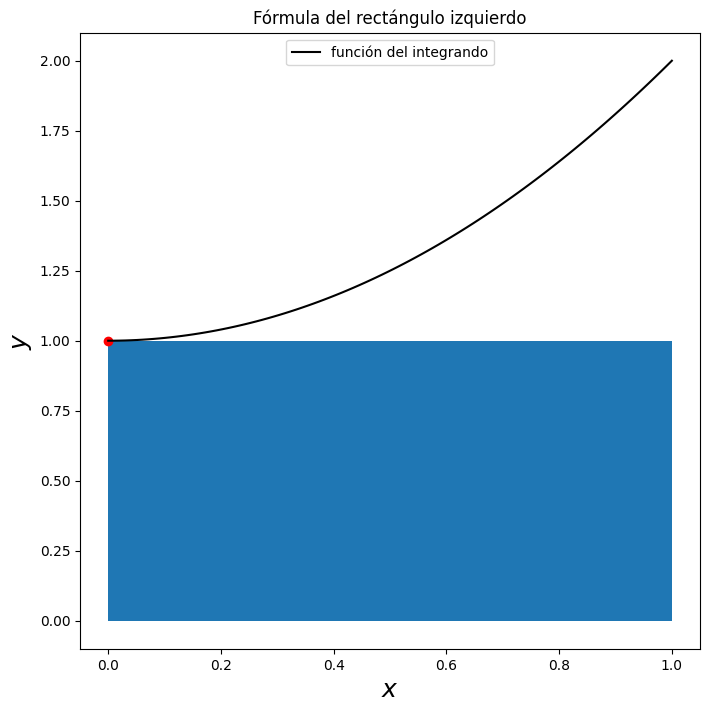

In [46]:
num_values = 100; a = 0; b = 1
x_values = np.linspace(float(a),float(b),num_values)
y_values = f(x_values)
x0 = a; y0 = f(x0)
fig,ax = plt.subplots(figsize=(8,8))
ax.plot(x0,y0,'ro')
ax.plot(x_values,y_values,'k',label='función del integrando')
ax.add_patch(
    patches.Rectangle(
        (a, 0),   # (x,y) coordenadas esquina inferior izquierda
        b-a,      # anchura, y
        y0,       # altura del rectángulo
    )
)
ax.legend(loc=9)
ax.set_xlabel('$x$',fontsize=18)
ax.set_ylabel('$y$',fontsize=18)
ax.set_title('Fórmula del rectángulo izquierdo');

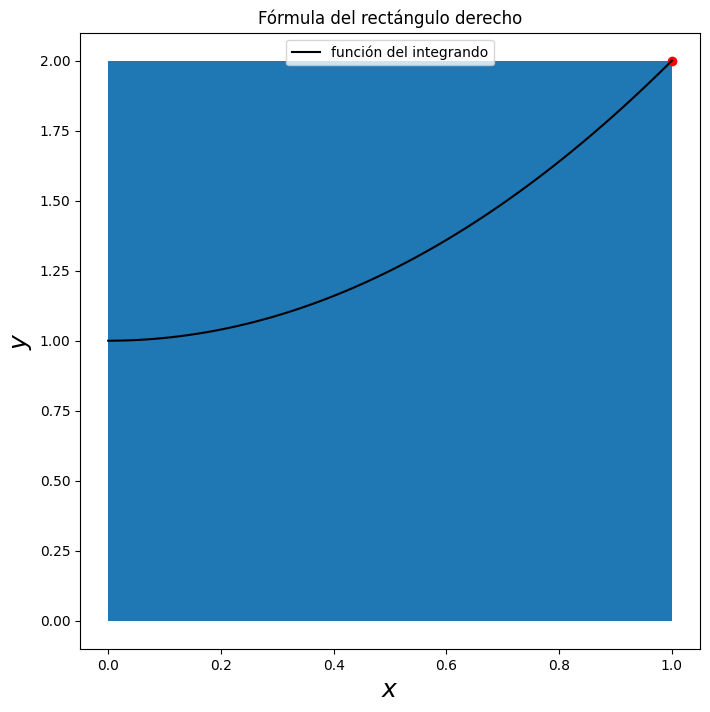

In [47]:
x_values = np.linspace(float(a),float(b),num_values)
y_values = f(x_values)
x0 = b; y0 = f(x0)
fig,ax = plt.subplots(figsize=(8,8))
ax.plot(x0,y0,'ro')
ax.plot(x_values,y_values,'k',label='función del integrando')
ax.add_patch(
    patches.Rectangle(
        (a, 0),   # (x,y) coordenadas esquina inferior izquierda
        b-a,      # anchura, y
        y0,       # altura del rectángulo
    )
)
ax.legend(loc=9)
ax.set_xlabel('$x$',fontsize=18)
ax.set_ylabel('$y$',fontsize=18)
ax.set_title('Fórmula del rectángulo derecho');

La idea ahora para obtener las correspondientes fórmulas compuestas, asociadas a estas reglas de cuadratura simples, sería aplicarlas a los subintervalos que obtendríamos al subdividir el intervalo original $[a,b]$ mediante una partición cualquiera del mismo:
$$a=x_0<x_1 < \ldots x_{i-1}<x_i<x_{i+1}<\ldots <x_{n-1}<x_n=b$$
aunque se suele emplear *particiones uniformes* (con $x_{i}-x_{i-1}=h\equiv \frac{b-a}{n},\; \forall i=1,\ldots,n$ para cierto valor entero natural $n\in \mathbb{N}$).

Así pues, para estas fórmulas de los rectángulos obtendríamos las siguientes expresiones en cada uno de los casos:

$$\int_a^b f(x)\,dx = \sum_{i=0}^{n-1}\int_{x_{i}}^{x_{i+1}} f(x)\,dx\approx  \sum_{i=0}^{n-1} (x_{i+1}- x_{i}) f(\psi_i)$$

donde $\psi_i = x_{i}, x_{i+1}$ o bien $\frac{x_{i}+ x_{i+1}}{2}$ según se trate de la fórmula de los rectángulos a izquierda, derecha o del punto medio.

Si se tratara de particiones uniformes podremos escribir

$$\int_a^b f(x)\,dx \approx h \sum_{i=0}^{n-1} f(\psi_i)$$
con $\psi_i = a+ i h, a+(i+1) h$ o bien $a+ (i+1/2)h$ según el caso, y así podríamos programarlo también sin mucha dificultad.

### 2.2.2. Fórmulas compuestas de los rectángulos 🔲🔲🔲

A continuación mostramos una implementación de la fórmula compuesta de los rectángulos a la izquierda.

In [48]:
def formula_rectangulo_izquierda(f,a,b,n):
    """fórmula compuesta de los rectangulos a izquierda"""
    h = (b-a)/n
    nodos = np.linspace(a, b, n+1)  # Genera los nodos de integración
    return h*np.sum(f(nodos[:-1]))

Con un valor de `n` razonablemente grande, debe aproximarse al valor real.

In [49]:
valor_aproximado = formula_rectangulo_izquierda(f,a,b,1000)
valor_aproximado

np.float64(1.3328335000000002)

In [50]:
abs(valor_exacto - valor_aproximado)

0.000499833333333033

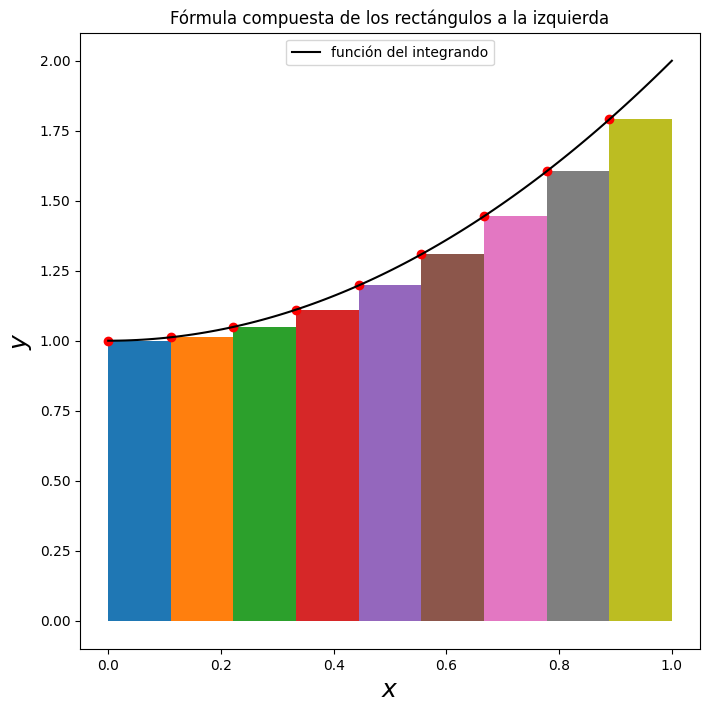

In [51]:
num_values = 100; num_nodos=10
x_values = np.linspace(float(a),float(b),num_values)
y_values = f(x_values)
x_nodos = np.linspace(a,b,num_nodos)
y_nodos = f(x_nodos)

fig,ax = plt.subplots(figsize=(8,8))
ax.plot(x_nodos[:-1],y_nodos[:-1],'ro')
ax.plot(x_values,y_values,'k',label='función del integrando')
for k in range(1,num_nodos):
    zz = np.linspace(float(x_nodos[k-1]),float(x_nodos[k]),num_values)
    yk = [linea(z, x_nodos[k-1], y_nodos[k-1], x_nodos[k], y_nodos[k-1]) for z in zz]
    ax.fill_between(zz,0,yk)


ax.legend(loc=9)
ax.set_xlabel('$x$',fontsize=18)
ax.set_ylabel('$y$',fontsize=18)
ax.set_title('Fórmula compuesta de los rectángulos a la izquierda');

> **Ejercicio 6:** Siguiendo el modelo y el código proporcionado para la fórmula de los rectángulos a la izquierda, codifique las fórmulas compuestas de los rectángulos a la derecha y centrados. Calcule con estas dos fórmulas la aproximación de $\displaystyle\int_0^1 (x^2+1)dx$, el error cometido y represente al menos una de las dos gráficamente.

### 2.2.3. Fórmulas de los trapecios (simple y compuesta) 🎪

Si ahora empleamos trapecios, en vez de rectángulos, para aproximar las integrales de la función integrando en cada uno de los subintervalos $[x_{i},x_{i+1}],\; i=0,1,\ldots,n-1$, sabiendo por otra parte que el área de un trapecio de base $[x_{i},x_{i+1}]$ y alturas $f(x_{i})$ y $f(x_{i+1})$ es $(x_{i+1}-x_i)\frac{f(x_{i})+f(x_{i+1})}{2}$, entonces llegaríamos a las siguientes fórmulas de los trapecios:

- simple (con $n=1$ y $x_0=a, \; x_1=b$):
$$\int_a^b f(x)\,dx\approx (b-a)\frac{f(a)+f(b)}{2}$$
- compuesta (para cierto $n\in \mathbb{N}$, con $n>1$, y particiones arbitrarias):
$$\int_a^b f(x)\,dx = \sum_{i=0}^{n-1}\int_{x_{i}}^{x_{i+1}} f(x)\,dx\approx  \sum_{i=0}^{n-1} (x_{i+1}- x_{i})\, \frac{f(x_{i})+f(x_{i+1})}{2}$$
- compuesta (para cierto $n\in \mathbb{N}$, con $n>1$, y particiones uniformes):
$$\int_a^b f(x)\,dx = \sum_{i=0}^{n-1}\int_{a+i\,h}^{a+(i+1)\,h} f(x)\,dx\\
\approx  h\; \sum_{i=0}^{n-1} \frac{f(a+i\,h)+f(a+(i+1)\,h)}{2} \\
= \frac{h}{2}\left( f(a)+2\sum_{i=1}^{n-1}f(a+i\,h)+f(b)\right)$$

Nótese que por otro lado, la fórmula de los trapecios simple se obtiene sin más que integrar en el intervalo $[a,b]$ la función lineal que pasa por los puntos $(a,f(a))$ y $(b,f(b))$ de manera que  $$\int_a^b \left( \frac{f(b)-f(a)}{b-a}(x-a)+f(a) \right)\,dx
= \left[ \frac{f(b)-f(a)}{b-a}\frac{(x-a)^2}{2}+f(a)(x-a) \right]_{x=a}^{x=b} = \\ \frac{f(b)-f(a)}{b-a}\frac{(b-a)^2}{2}+f(a)(b-a)=\frac{b-a}{2}(f(b)-f(a)+2f(a))= \frac{b-a}{2}(f(a)+f(b))$$.

En la siguiente celda mostramos el código de la fórmula de los trapecios compuesta.

In [52]:
def formula_trapecios(f,a,b,num_nodos):
    """fórmula compuesta de los trapecios con partición uniforme"""
    h = (b-a)/num_nodos
    nodos = np.linspace(a, b, num_nodos+1)  # Genera los nodos de integración (incluyendo los extremos)
    # Otra opción sería
    # nodos = np.array([a + i*h for i in range(num_nodos+1)])

    return h/2*(f(a)+2*np.sum(f(nodos[1:-1]))+f(b))
    # Otra posible implementación sería
    # return h/2*(f(a)+2*sum([f(a+i*h) for i in range(1,num_nodos)])+f(b))

In [53]:
valor_aproximado = formula_trapecios(f,a,b,1000) # valor aproximado de la integral definida
valor_aproximado

np.float64(1.3333335)

Calculemos el error:

In [54]:
abs(valor_aproximado - valor_exacto)

1.66666666689963e-7

Vemos que mejora considerablemente al error cometido por la fórmula de los rectángulos a la izquierda.

A continuación, representamos gráficamente la fórmula del trapecio simple:

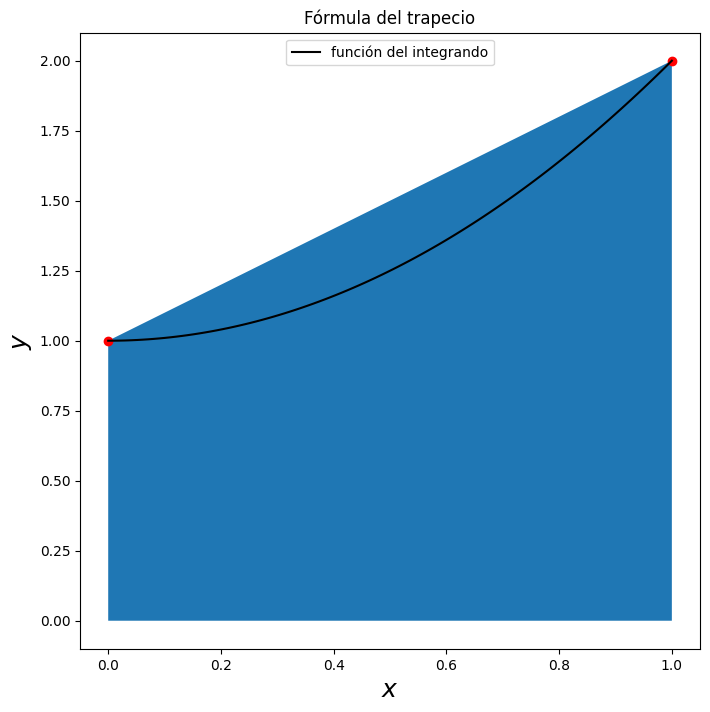

In [55]:
num_values = 100
x_values = np.linspace(float(a),float(b),num_values)
y_values = f(x_values)
x0 = [a,b]; y0 = [f(a),f(b)]
zz = (y0[1]-y0[0])/(b-a)*(x_values-a)+y0[0]
fig,ax = plt.subplots(figsize=(8,8))
ax.plot(x0,y0,'ro')
ax.plot(x_values,y_values,'k',label='función del integrando')
ax.fill_between(x_values,0,zz)
ax.legend(loc=9)
ax.set_xlabel('$x$',fontsize=18)
ax.set_ylabel('$y$',fontsize=18)
ax.set_title('Fórmula del trapecio');

Y la fórmula compuesta:

Text(0.5, 1.0, 'Fórmula del trapecio compuesta')

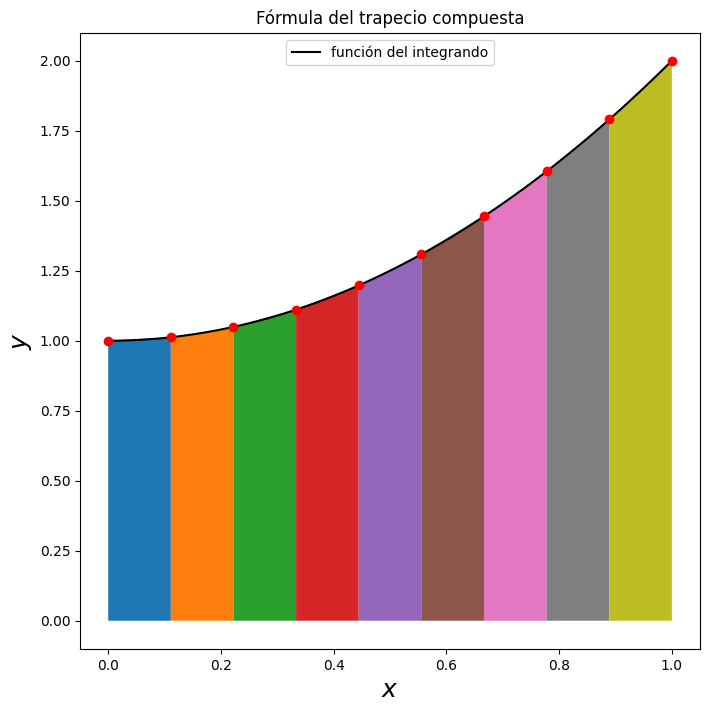

In [56]:
num_values = 100
num_nodos=10
x_values = np.linspace(float(a),float(b),num_values)
y_values = f(x_values)
x_nodos = np.linspace(a,b,num_nodos)
y_nodos = f(x_nodos)

fig,ax = plt.subplots(figsize=(8,8))
ax.plot(x_values,y_values,'k',label='función del integrando')
for k in range(1,num_nodos):
    zz = np.linspace(float(x_nodos[k-1]),float(x_nodos[k]),num_values)
    yk = [linea(z,x_nodos[k-1],y_nodos[k-1],x_nodos[k],y_nodos[k]) for z in zz]
    ax.fill_between(zz,0,yk)
ax.plot(x_nodos,y_nodos,'ro')


ax.legend(loc=9)
ax.set_xlabel('$x$',fontsize=18)
ax.set_ylabel('$y$',fontsize=18)
ax.set_title('Fórmula del trapecio compuesta')

### 2.2.4. Fórmulas de Simpson (simple y compuesta) 💛

Ya hemos visto que las *fórmulas simples* de integración numérica  se pueden obtener sin más que sustituir la función del integrando por un polinomio de interpolación de grado cero (en el caso de las fórmulas de los rectángulos) o bien por un polinomio de grado uno que iterpola los valores de la función en ambos extremos del intervalo.

Por otro lado, para obtener las correspondientes *fórmulas compuestas*, bastaría con sustituir la función en el intervalo total $[a,b]$ por funciones polinómicas a trozos: ya sea de grado cero discontinuas, (en el caso de las fórmulas de los rectángulos) o bien lineales continuas (en el caso de la fórmula de los trapecios compuesta).

En el caso de la fórmula de Simpson que nos ocupa ahora, este procedimiento se lleva un paso más allá, considerando ahora polinomios de grado $2$ (es decir, una parábola en el caso de la *fórmula de Simpson* simple o bien trozos de parábolas consecutivos, en el caso de la fórmula de Simpson compuesta).

In [93]:
xL,yL,xM,yM,xR,yR = sp.symbols('x_L,y_L,x_M,y_M,x_R,y_R')
a, b = sp.symbols('a,b')
dyL,dyR = sp.symbols('dyL,dyR')

parabola_3_puntos = sp.interpolate([(xL,yL),(xM,yM),(xR,yR)],x).factor() # Interpolación de Lagrange para 3 puntos
parabola_3_puntos

-(x**2*x_L*y_M - x**2*x_L*y_R - x**2*x_M*y_L + x**2*x_M*y_R + x**2*x_R*y_L - x**2*x_R*y_M - x*x_L**2*y_M + x*x_L**2*y_R + x*x_M**2*y_L - x*x_M**2*y_R - x*x_R**2*y_L + x*x_R**2*y_M - x_L**2*x_M*y_R + x_L**2*x_R*y_M + x_L*x_M**2*y_R - x_L*x_R**2*y_M - x_M**2*x_R*y_L + x_M*x_R**2*y_L)/((x_L - x_M)*(x_L - x_R)*(x_M - x_R))

In [94]:
# Comprobamos que el polinomio interpolador pasa por los puntos (xL,yL), (xM,yM) y (xR,yR)
parabola_3_puntos.subs({x:xL}).simplify(), \
parabola_3_puntos.subs({x:xM}).simplify(), \
parabola_3_puntos.subs({x:xR}).simplify()

(y_L, y_M, y_R)

Si ahora integramos la parábola que pasa por los puntos determinados por los valores de cierta función en los extremos del intervalo $[x_L,x_R]$: $(x_L,y_L)$ y $(x_R,y_R)$, así como por el correspondiente valor $y_M$ en el punto medio del intervalo $\frac{x_L+x_R}{2}$, obtendremos la fórmula de Simpson simple.

In [95]:
parabola_simpson = sp.interpolate([(xL,yL),((xL+xR)/2,yM),(xR,yR)],x)
sp.integrate(parabola_simpson,[x,xL,xR]).factor()

-(x_L - x_R)*(y_L + 4*y_M + y_R)/6

Un método alternativo, pero equivalente, consistiría en imponer exactitud al menos para los monomios generadores de la base canónica de  $\mathbb{P}_2\equiv L(\{1,x,x^2\})$, los polinomios de grado menor o igual que $2$.  Veámos cómo sería el proceso para esta fórmula de Simpson.

In [60]:
AB = sp.Matrix([ [a**k,((a+b)/2)**k,b**k, sp.integrate(x**k,[x,a,b])] for k in range(3)])
AB

Matrix([
[   1,              1,    1,           -a + b],
[   a,      a/2 + b/2,    b, -a**2/2 + b**2/2],
[a**2, (a/2 + b/2)**2, b**2, -a**3/3 + b**3/3]])

In [61]:
?sp.linsolve

Signature: sp.linsolve(system, *symbols)
Docstring:
Solve system of $N$ linear equations with $M$ variables; both
underdetermined and overdetermined systems are supported.
The possible number of solutions is zero, one or infinite.
Zero solutions throws a ValueError, whereas infinite
solutions are represented parametrically in terms of the given
symbols. For unique solution a :class:`~.FiniteSet` of ordered tuples
is returned.

All standard input formats are supported:
For the given set of equations, the respective input types
are given below:

.. math:: 3x + 2y -   z = 1
.. math:: 2x - 2y + 4z = -2
.. math:: 2x -   y + 2z = 0

* Augmented matrix form, ``system`` given below:

$$ \text{system} = \left[{array}{cccc}
    3 &  2 & -1 &  1\\
    2 & -2 &  4 & -2\\
    2 & -1 &  2 &  0
    \end{array}\right] $$

::

    system = Matrix([[3, 2, -1, 1], [2, -2, 4, -2], [2, -1, 2, 0]])

* List of equations form

::

    system  =  [3x + 2y - z - 1, 2x - 2y + 4z + 2, 2x - y + 2z]

* Input $A$ an

In [62]:
c0,c1,c2 = sp.symbols('c0,c1,c2')
sp.linsolve(AB,[c0,c1,c2])

{(-a/6 + b/6, -2*a/3 + 2*b/3, -a/6 + b/6)}

Vemos que hubiéramos obtenido exactamente la misma fórmula por este procedimiento

$$ \int_a^b f(x)\,dx \approx \frac{b-a}{6} \left( f(a)+ 4f\left(\frac{a+b}{2}\right) +f(b) \right)$$

> **Ejercicio 7:** Implemente una función que calcule la integral de una función $f$ en el intervalo $[a,b]$ usando la fórmula de Simpson compuesta, parametrizando también el número de subintervalos utilizados (se premia la eficiencia). Represente gráficamente la fórmula de Simpson compuesta análogamente a la representación mostrada para la fórmula de los trapecios compuesta.

>**Ejercicio 8:** Realice una comparativa entre los errores cometidos al aproximar funciones potencias sucesivas $x^i$, con $i=1,2,3,\ldots$ en el intervalo $[0,1]$ mediante las fórmulas de los trapecios y de Simpson compuestas con diferentes valores de $h$; e inducir de ahí, los posibles órdenes de exactitud (a partir de los valores de $i$ que proporcionen valores exactos de la integral). No deje de tener en cuenta los posibles errores de redondeo, inevitables en todo cálculo realizado con ordenador.

### 2.2.5. Integración Romberg ↘️

La integración Romberg es una técnica que combina la fórmula compuesta de los trapecios, que denotamos como

$$
    T_n = \frac h 2 \left( f(a) + 2\sum_{i=1}^{n-1} f(a+ih) + f(b) \right),
$$
donde $h=(b-a)/n$, con diferentes valores de $n$ para aumentar el orden del término de error.

La idea es construir la tabla


|          |          |          |          |          |          |
|:--------:|:--------:|:--------:|:--------:|:--------:|:--------:|
| $R(0,0)$ |          |          |          |          |          |
| $R(1,0)$ | $R(1,1)$ |          |          |          |          |
| $\vdots$ | $\vdots$ | $\ddots$ |          |          |          |
| $R(j,0)$ | $R(j,1)$ | $\ddots$ | $R(j,j)$ |          |          |
| $\vdots$ | $\vdots$ | $\ddots$ | $\vdots$ | $\ddots$ |          |
| $R(N,0)$ | $R(N,1)$ | $\cdots$ | $R(N,j)$ | $\cdots$ | $R(N,N)$ |



donde

$$
R(j,0) = T_{2^j}, \qquad R(j,k) = \dfrac{4^k R(j,k-1)-R(j-1,k-1)}{4^k-1}, j=0,\dots,N,\ \ k = 1,\dots,j.
$$
y aproximar el valor de la integral mediante la sucesión $\{R(N,N)\}$, estableciendo un criterio de parada basado en que la diferencia absoluta de dos terminos consecutivos sea menor que una tolerancia prefijada.


### 2.2.6. Integración adaptativa 🛏️

Hasta el momento, todas las fórmulas compuestas han utilizado nodos equiespaciados, que tienen la facilidad de que son muy sencillos de calcular, pero podrían suponer un problema en funciones con regiones cambiantes. La integración adaptativa, como su propio nombre indica, adapta el tamaño de los intervalos de acuerdo a las variaciones de la función. Para ello, dado un intervalo de integración $[a,b]$, consideramos la semiamplitud del intervalo $h=(b-a)/2$, el valor medio $m=(a+b)/2$ y denotamos la fórmula de Simpson simple como
$$
S(a,b) = \frac h 3 (f(a)+4 f(m) + f(b)).
$$
Ahora, como sabemos que
$$
\int_a^b f(x) dx = \int_a^m f(x) dx + \int_m^b f(x) dx,
$$
aproximamos cada una de las integrales mediante la regla de Simpson y fijamos una tolerancia $\varepsilon$, de forma que, si
$$
|S(a,b) - S(a,m) - S(m,b)| < \varepsilon,
$$
entonces aceptamos la aproximación $S(a,b) \approx \int_a^b f(x) dx $. En caso de que esto no se cumpla, repetimos el algoritmo por separado en cada uno de los subintervalos $[a,m]$ y $[m,b]$ con tolerancia $\varepsilon/2$.

>**Ejercicio 9:** Programar las técnicas de integración de Romberg y adaptativa, para después aplicarlas a la aproximación de la siguiente integral $$\int_a^b p(x)\, dx$$
>siendo  $\;a=\displaystyle\min_{0\leq i\leq 7}{d_i}$, $\;b=\displaystyle\max_{0\leq i\leq 7}{d_i}$ y
>$$p(x)=d_0 + d_1 x + d_2 x^2 + d_3 x^3+ d_4 x^4 + d_5 x^5 + d_6 x^6 + d_7 x^7 $$
>(siendo $d_0, d_1, \ldots, d_7$ los dígitos de su DNI, pasaporte o tarjeta de residente).

### 2.2.7 Fórmulas gaussianas

Las fórmulas gaussianas usan como nodos aquellos que conducen a una precisión máxima. Si vamos a construir una fórmula de integración numérica con $n$ nodos, sabemos que podemos elegirlos de manera única, de forma que la fórmula correspondiente alcanza precisión $2n-1$. Por tanto, para construir fórmulas gaussianas, hemos de calcular los nodos y los coeficientes. Para ello, primero calcularemos los nodos y después resolveremos el sistema de ecuaciones lineales que nos dará el valor de los coeficientes.

Lo haremos a continuación, puesto que *Python* (o cualquier otro sistema que permita realizar cálculos simbólicos, o bien numéricos) lo resuelve sin dificultad para valores de $n$ bajos. También sabemos que los nodos de una fórmula gaussiana son los ceros de cierto polinomio ortogonal. Para los productos escalares más usuales, los *polinomios ortogonales* correspondientes están contenidos en ciertos módulos concretos de *Python*; por tanto, podemos calcular sus raíces para obtener dichos nodos. Lo haremos para los polinomios de Chebyshev. En un caso especial es posible encontrar el polinomio ortogonal correspondiente y calcular sus raíces con la orden correspondiente.

#### La fórmula gaussiana con dos nodos y peso $w=1$

Siguiendo el Ejemplo 1 de las diapositivas de teoría, vamos a calcular la fórmula gaussiana con dos nodos $x_0$ y $x_1$.
$$
\int_{-1}^1 f(x) dx = c_0 f(x_0) + c_1 f(x_1) + R(f)
$$

In [63]:
f = sp.Function('f')
x = sp.Symbol('x')
x0, x1 = sp.symbols('x_0,x_1')
c0, c1 = sp.symbols('c_0,c_1')

a, b = -1, 1
n = 2

Primero calculamos los nodos imponiendo que el polinomio $\Pi(x)=(x-x_0)(x-x_1)$ verifique
$$
\int_{-1}^1 \Pi(x)dx = 0, \qquad \int_{-1}^1 x\Pi(x)dx = 0. 
$$

In [64]:
pol = (x-x0)*(x-x1)

ecs = [sp.integrate(pol,[x,a,b]),
       sp.integrate(pol*x,[x,a,b])]

x0, x1 = sp.solve(ecs,[x0,x1])[0]
x0,x1

(-sqrt(3)/3, sqrt(3)/3)

Una vez calculados los nodos, calculamos los coeficientes imponiendo exactitud en $\{1,x\}$, esto es:
$$
c_0\cdot 1 + c_1\cdot 1 = \int_{-1}^1 1 \cdot dx , \qquad c_0 x_0 + c_1 x_1 = \int_{-1}^1 x dx.
$$

In [65]:
ecs = [ sp.Eq(c0    + c1,    sp.integrate(1,(x,-1,1))),
        sp.Eq(c0*x0 + c1*x1, sp.integrate(x,(x,-1,1)))]

In [66]:
ecs[0]

Eq(c_0 + c_1, 2)

In [67]:
ecs[1]

Eq(-sqrt(3)*c_0/3 + sqrt(3)*c_1/3, 0)

In [68]:
sols = sp.solve(ecs,[c0,c1])
c0, c1 = sols[c0], sols[c1],
c0, c1

(1, 1)

Finalmente, la fórmula gaussiana (fórmula de Gauss-Legendre) es:

In [69]:
c0*f(x0) + c1*f(x1)

f(-sqrt(3)/3) + f(sqrt(3)/3)

Vemos pues que con la ayuda del comando `solve` del módulo de cálculo simbólico `SymPy` hemos podido obtener sin demasiado problema tanto los coeficientes de la fórmula Gaussiana como los nodos que hace falta considerar para obtener la máxima exactitud en el intervalo considerado ($[-1,1]$ en este caso). También vemos que
uno de los posibles inconvenientes para la obtención de estas fórmulas gaussianas es que debemos resolver sistemas de ecuaciones no lineales, no siempre fáciles de resolver, aparte de que los nodos suelen ser números trascencentes, y si no trabajáramos en simbólico, ya su mera aproximación introduciría un primer error.

#### Fórmulas de Gauss-Chebyshev

En este caso vamos a deducir una fórmula gaussiana para un peso que no es idénticamente nulo. En particular, en el intervalo $[-1,1]$, consideramos el peso $w(x)=\dfrac 1 {\sqrt{1-x^2}}$. De acuerdo con el método, buscamos un polinomio $\Pi(x)$ que verifique
$$
L(x^j \Pi(x)) = \int_{-1}^1 \dfrac{x^j\Pi(x)}{\sqrt{1-x^2}}dx = 0,\qquad j=0,\dots,n.
$$

Los polinomios que verifican esta propiedad son conocidos como polinomios de Chebyshev, a menudo denotados como $T_k$. En `sympy`, podemos encontrarlos utilizando la función `chebyshevt`. Sin embargo, a nosotros nos interesan las raíces de estos polinomios, que afortunadamente también son conocidas y se pueden obtener mediante la función `chebyshevt_root`.


In [70]:
from sympy import chebyshevt, chebyshevt_root

print("Polinomios de Chebyshev de diferentes grados:")
for j in range(10):
    print(f"Grado {j}: {chebyshevt(j,x)}")

Polinomios de Chebyshev de diferentes grados:
Grado 0: 1
Grado 1: x
Grado 2: 2*x**2 - 1
Grado 3: 4*x**3 - 3*x
Grado 4: 8*x**4 - 8*x**2 + 1
Grado 5: 16*x**5 - 20*x**3 + 5*x
Grado 6: 32*x**6 - 48*x**4 + 18*x**2 - 1
Grado 7: 64*x**7 - 112*x**5 + 56*x**3 - 7*x
Grado 8: 128*x**8 - 256*x**6 + 160*x**4 - 32*x**2 + 1
Grado 9: 256*x**9 - 576*x**7 + 432*x**5 - 120*x**3 + 9*x


La función `chebyshevt_root(n,k)` devuelve la `k`-ésima raíz del polinomio de Chebyshev de grado `n`.

In [97]:
n = 3
chebyshevt_root(n,2)

-sqrt(3)/2

Calculamos por tanto todos los nodos $x_0,\dots,x_{n-1}$

In [72]:
nodos = [chebyshevt_root(n,k) for k in range(n)]
nodos

[sqrt(3)/2, 0, -sqrt(3)/2]

Por último, para obtener los pesos, imponemos exactitud en $1,x,\dots,x^{n-1}$. Esto es, resolver el sistema
$$
\sum_{k=0}^{n-1} c_k x_k^j =  \int_{-1}^1 \dfrac{x^j}{\sqrt{1-x^2}}dx, \qquad j=0,\dots,n-1.
$$

Tenemos entonces la lista de coeficientes (incógnitas)

In [73]:
c = sp.symbols('c0:'+ str(n)) # generamos una tupla de n coeficientes
coefs = list(c)
coefs

[c0, c1, c2]

Creamos las ecuaciones

In [74]:
ecs = [ sp.Eq(sum([ci*(xi**j) for ci,xi in zip(coefs, nodos)]), sp.integrate(x**j/sp.sqrt(1-x**2), (x,-1,1)) ) for j in range(n) ]
ecs

[Eq(c0 + c1 + c2, pi),
 Eq(sqrt(3)*c0/2 - sqrt(3)*c2/2, 0),
 Eq(3*c0/4 + 3*c2/4, pi/2)]

Y encontramos las soluciones

In [75]:
sols = sp.solve(ecs,coefs)
sols

{c0: pi/3, c1: pi/3, c2: pi/3}

Finalmente la fórmula de Gauss-Chebyshev calculada es:

In [76]:
sum([ci*f(xi) for ci,xi in zip(sols.values(), nodos)]).factor()

pi*(f(0) + f(-sqrt(3)/2) + f(sqrt(3)/2))/3

### 2.2.8. Otras posibilidades para la integración numérica usando algunos módulos de Python 🐍

*Python* tiene también  varias órdenes para la integración de funciones, ya sea de manera simbólica o numérica. Cada una de ellas vendrá implementada en cierto módulo concreto de Python, por lo que será conveniente saber dónde y cómo deberemos cargar y usar dichas órdenes.

Por ejemplo, para la integración simbólica usaremos evidentemente la orden correspondiente incorporada en el módulo `SymPy`. Esta órden es `integrate`, que ya la hemos utilizado anteriormente. A continuación vemos algunos otros ejemplos de uso, tanto para obtener integrales indefinidas (primitivas) como integrales definidas, de forma exacta siempre que sea posible. Nótese que esta orden requiere que la función tenga una primitiva, a la que aplica la regla de Barrow en el caso de tratarse de una integral definida.

In [77]:
x = sp.Symbol('x')

In [78]:
# Integral indefinida
sp.integrate(x,x)

x**2/2

In [79]:
# Integral definida
sp.integrate(x,[x,0,1])

1/2

In [80]:
sp.integrate(x**2,x),sp.integrate(x**2,[x,0,1])

(x**3/3, 1/3)

In [81]:
# Nótese aquí el efecto de indicar alguno de los límites
# de integración con el punto decimal
sp.integrate(x**3-x+2,[x,0,1]),sp.integrate(x**3-x+2,[x,0,1.])

(7/4, 1.75000000000000)

Si intentamos integrar una función que no tiene primitiva

In [82]:
sp.integrate(sp.exp(x**2),x)

sqrt(pi)*erfi(x)/2

[¿Qué es eso de erfi?](https://docs.sympy.org/latest/modules/functions/special.html#sympy.functions.special.error_functions.erfi)

In [83]:
?sp.erfi

Init signature: sp.erfi(z)
Docstring:     
Imaginary error function.

Explanation

The function erfi is defined as:

.. math ::
    \mathrm{erfi}(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{t^2} \mathrm{d}t

Examples

>>> from sympy import I, oo, erfi
>>> from sympy.abc import z

Several special values are known:

>>> erfi(0)
0
>>> erfi(oo)
oo
>>> erfi(-oo)
-oo
>>> erfi(I*oo)
I
>>> erfi(-I*oo)
-I

In general one can pull out factors of -1 and $I$ from the argument:

>>> erfi(-z)
-erfi(z)

>>> from sympy import conjugate
>>> conjugate(erfi(z))
erfi(conjugate(z))

Differentiation with respect to $z$ is supported:

>>> from sympy import diff
>>> diff(erfi(z), z)
2*exp(z**2)/sqrt(pi)

We can numerically evaluate the imaginary error function to arbitrary
precision on the whole complex plane:

>>> erfi(2).evalf(30)
18.5648024145755525987042919132

>>> erfi(-2*I).evalf(30)
-0.995322265018952734162069256367*I

See Also

erf: Gaussian error function.
erfc: Complementary error function.
erf2: Two-argu

In [84]:
sp.integrate(sp.exp(-x**2),[x,-sp.oo,sp.oo])

sqrt(pi)

In [85]:
sp.integrate(sp.cos(x**2),x)

sqrt(2)*sqrt(pi)*fresnelc(sqrt(2)*x/sqrt(pi))*gamma(1/4)/(8*gamma(5/4))

[¿De donde sale esa C?](https://docs.sympy.org/latest/modules/functions/special.html#sympy.functions.special.error_functions.fresnelc)

In [86]:
sp.fresnelc?

Init signature: sp.fresnelc(z)
Docstring:     
Fresnel integral C.

Explanation

This function is defined by

.. math:: \operatorname{C}(z) = \int_0^z \cos{\frac{\pi}{2} t^2} \mathrm{d}t.

It is an entire function.

Examples

>>> from sympy import I, oo, fresnelc
>>> from sympy.abc import z

Several special values are known:

>>> fresnelc(0)
0
>>> fresnelc(oo)
1/2
>>> fresnelc(-oo)
-1/2
>>> fresnelc(I*oo)
I/2
>>> fresnelc(-I*oo)
-I/2

In general one can pull out factors of -1 and $i$ from the argument:

>>> fresnelc(-z)
-fresnelc(z)
>>> fresnelc(I*z)
I*fresnelc(z)

The Fresnel C integral obeys the mirror symmetry
$\overline{C(z)} = C(\bar{z})$:

>>> from sympy import conjugate
>>> conjugate(fresnelc(z))
fresnelc(conjugate(z))

Differentiation with respect to $z$ is supported:

>>> from sympy import diff
>>> diff(fresnelc(z), z)
cos(pi*z**2/2)

Defining the Fresnel functions via an integral:

>>> from sympy import integrate, pi, cos, expand_func
>>> integrate(cos(pi*z**2/2), z)
fresnelc

In [87]:
sp.integrate(sp.cos(x**2),[x,0,1])

sqrt(2)*sqrt(pi)*fresnelc(sqrt(2)/sqrt(pi))*gamma(1/4)/(8*gamma(5/4))

Por otro lado estarían las órdenes específicas para la integración numérica, entre las que resaltamos la órden [`quad`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) para la integración de funciones de una variable. Existen las correspondientes versiones para funciones de dos y tres variables ([`dblquad`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.dblquad.html#scipy.integrate.dblquad) y [`tplquad`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.tplquad.html#scipy.integrate.tplquad)) que nos permitirán aproximar numéricamente integrales dobles y triples, respectivamente. Todas ellas se encuentran implementadas dentro del submódulo `integrate` del módulo `SciPy` y tendremos que cargarlas previamente para poder usarlas.

In [88]:
from scipy.integrate import quad, dblquad, tplquad

Empecemos con la orden `quad`, que nos permitirá aproximar la integral definida de una función real de variable real en un intervalo determinado. Así pues, esta orden lleva programada una integración numérica adaptativa que puede en principio ser aplicada a cualquier función definida y acotada en un intervalo $[a,b]$.
Por otro lado, tiene bastantes argumentos opcionales que pueden ser usados para afinar mucho más en el cálculo de dicha aproximación numérica.

In [89]:
?quad

Signature:
quad(
    func,
    a,
    b,
    args=(),
    full_output=0,
    epsabs=1.49e-08,
    epsrel=1.49e-08,
    limit=50,
    points=None,
    weight=None,
    wvar=None,
    wopts=None,
    maxp1=50,
    limlst=50,
    complex_func=False,
)
Docstring:
Compute a definite integral.

Integrate func from `a` to `b` (possibly infinite interval) using a
technique from the Fortran library QUADPACK.

Parameters
----------
func : {function, scipy.LowLevelCallable}
    A Python function or method to integrate. If `func` takes many
    arguments, it is integrated along the axis corresponding to the
    first argument.

    If the user desires improved integration performance, then `f` may
    be a `scipy.LowLevelCallable` with one of the signatures::

        double func(double x)
        double func(double x, void *user_data)
        double func(int n, double *xx)
        double func(int n, double *xx, void *user_data)

    The ``user_data`` is the data contained in the `scipy.LowLevelCa

In [90]:
def f(x):
    """función del integrando: x^2+1"""
    return x**2+1

In [91]:
# No obstante, su uso básico sería el siguiente:
# f sería la función del integrando,
# que debería estar definida previamente
# a no ser que usemos una función 'lambda'

x_min = 0 # el límite inferior en la variable de integración x
x_max = 1 # el límite superior en la variable de integración x

val, abserr = quad(f, x_min, x_max)

# en las variables val y abserr almacenaremos el valor aproximado
# de la integral, así como la estimación del error cometido en
# valor absoluto

print (f"valor aprox. de la integral = {val},\nerror estimado = {abserr}")

valor aprox. de la integral = 1.3333333333333333,
error estimado = 1.4802973661668752e-14


> **Ejercicio 10:** Calcule la misma integral del ejercicio 9 pero utilizando la orden `quad` y compare los resultados de la integración Romberg y adaptativa manuales con los de la orden `quad`.

In [92]:
print("Fin de la práctica 🏁")

Fin de la práctica 🏁
